- 1º Dependência da Acurácia em Relação ao Tamanho da Base de Dados

In [80]:
import pandas as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score ,classification_report, zero_one_loss
sns.set_theme()
Dataset = pd.read_csv('wdbc_normalizacao.csv')
#Dataset.round(2)

#Para 30 instancias TEMOS:
Dataset = Dataset.head(60)
Dataset 

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.22100,0.4366,0.20750


**Para Validação Dividimos os Dados:** 
- **treino**,75% 
- **teste**, 25%

In [81]:
from sklearn.model_selection import train_test_split

# Dividindo em treino e teste 85% treino e 15% teste:
D_treino, D_teste = train_test_split(Dataset, test_size=.15, random_state=30) #test_size, por padrão é 25%

print("D_treino: ", D_treino.shape, dict(D_treino.iloc[:, 0].value_counts()))
print("D_teste: ", D_teste.shape, dict(D_teste.iloc[:, 0].value_counts()))

D_treino:  (51, 31) {1: 42, 0: 9}
D_teste:  (9, 31) {1: 5, 0: 4}


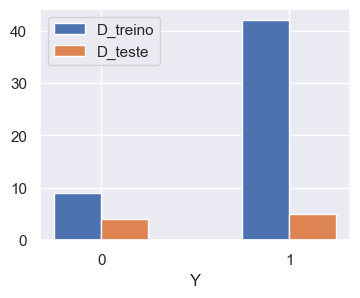

In [82]:
# visualizar as amostras:
plt.figure(figsize=(4,3))
plt.hist([D_treino.iloc[:, 0], D_teste.iloc[:, 0]], bins=[0,1,2], align='left', rwidth=0.5)
plt.legend(['D_treino','D_teste'])
plt.xlabel('Y'), plt.xticks([0,1])
plt.show()

In [83]:
# Selecionado os atributos e classes de treino e teste.
X_treino = D_treino.iloc[:, 1:31]
Y_treino = D_treino.iloc[:, 0]
print("D_treino: ", (X_treino.shape, Y_treino.shape))

X_teste = D_teste.iloc[:, 1:31]
Y_teste = D_teste.iloc[:, 0]
print("D_teste: ", (X_teste.shape, Y_teste.shape))


D_treino:  ((51, 30), (51,))
D_teste:  ((9, 30), (9,))


**Normalização:**

In [84]:
def Normalization(x):
        
    return x/x.abs().max()

In [85]:
X_treino_Normalizado = Normalization(X_treino)
X_teste_Normalizado = Normalization(X_teste)

In [86]:
# Importando o KNN
from sklearn.neighbors import KNeighborsClassifier

In [87]:
# Criando o classificador
clf = KNeighborsClassifier(n_neighbors=2)

In [88]:
# Fazendo o fit com os dados de treino
clf = clf.fit(X_treino_Normalizado,Y_treino)

In [89]:
# Fazendo a previsão para os dados de teste
y_pred = clf.predict(X_teste_Normalizado)

In [90]:
# Verificando a matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_teste,y_pred)

array([[0, 4],
       [0, 5]], dtype=int64)

In [91]:
def teste(g, D_tst, metrica, **kwds):
    X_tst, y_tst = D_tst
    y_true = y_tst
    y_pred = clf.predict(X_tst)
    E_tst = metrica(y_true, y_pred, **kwds)
    
    return E_tst


def validacao(Modelo, D_trn, D_val, metrica, **kwds):
    # Treinamento:
    g = Modelo.fit(*D_trn)
    
    # Teste:
    E_trn = teste(g, D_trn, metrica, **kwds)
    E_val = teste(g, D_val, metrica, **kwds)
    
    return E_trn, E_val

In [92]:
# Dividindo em  dados de treino e validação 15%
X_train, X_val, y_train, y_val = train_test_split(X_treino_Normalizado, Y_treino, test_size=0.15, random_state=30)

In [93]:
#Avaliando o modelo: 
E_trn, E_tst = validacao(clf, (X_train, y_train), (X_teste, Y_teste), zero_one_loss)
print("Erro de treinamento:", E_trn)
print("Erro de teste :", E_tst)


Erro de treinamento: 0.0
Erro de teste : 0.4444444444444444


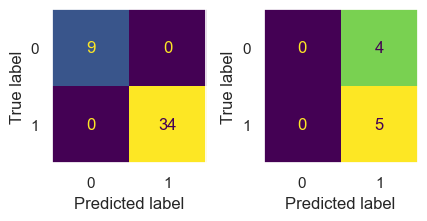

In [94]:
# Plot matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_trn, cm_tst = validacao(clf, (X_train, y_train), (X_teste_Normalizado, Y_teste), confusion_matrix)

with sns.plotting_context(rc={'grid.linewidth': 0}):
    fig, ax = plt.subplots(ncols=2, figsize=(5,2))
    ConfusionMatrixDisplay(confusion_matrix=cm_trn, display_labels=[0,1]).plot(ax=ax[0], colorbar=False)
    ConfusionMatrixDisplay(confusion_matrix=cm_tst, display_labels=[0,1]).plot(ax=ax[1], colorbar=False)

In [95]:
accuracy = accuracy_score(Y_teste, y_pred)
print("Acurácia ", accuracy)

Acurácia  0.5555555555555556


In [96]:
# Avaliação modelo  (relatório de classificação)
cr_trn, cr_tst = validacao(clf, (X_train, y_train), (X_teste_Normalizado, Y_teste),
                            classification_report, target_names=['Outcome 0', 'Outcome 1'])
print("treino:\n", cr_trn)
print("teste :\n", cr_tst)

treino:
               precision    recall  f1-score   support

   Outcome 0       1.00      1.00      1.00         9
   Outcome 1       1.00      1.00      1.00        34

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

teste :
               precision    recall  f1-score   support

   Outcome 0       0.00      0.00      0.00         4
   Outcome 1       0.56      1.00      0.71         5

    accuracy                           0.56         9
   macro avg       0.28      0.50      0.36         9
weighted avg       0.31      0.56      0.40         9



C:\Users\cajad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cajad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cajad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

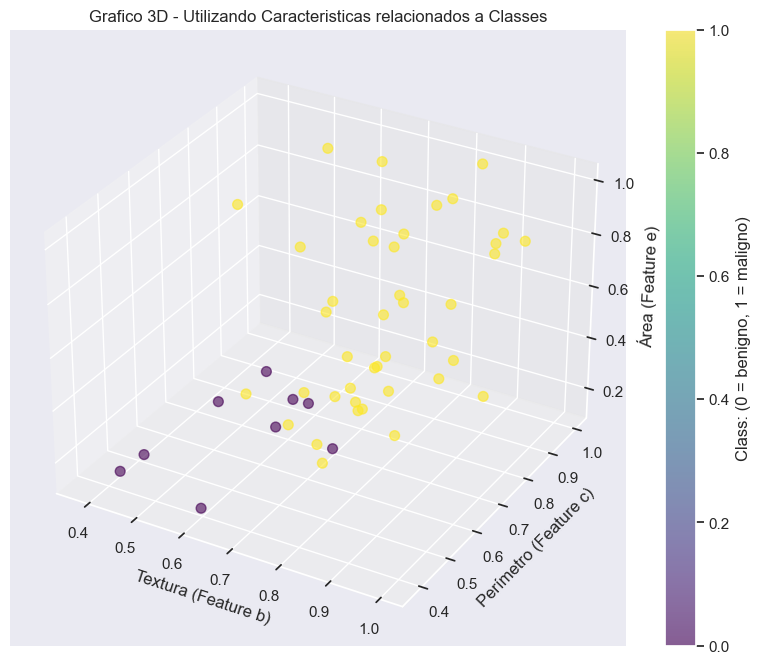

In [97]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

"""
Caracteristicas X_treino
a) raio (média das distâncias do centro aos pontos do perímetro)
  b) textura (desvio padrão dos valores da escala de cinza)
  c) perímetro
  e) área
  e) suavidade (variação local nos comprimentos dos raios)
  f) compacidade (perímetro ^ 2 / área - 1,0)
  g) concavidade (gravidade das porções côncavas do contorno)
  h) pontos côncavos (número de porções côncavas do contorno)
  e) simetria
  j) dimensão fractal ("aproximação da linha costeira" - 1)
  
  SERÁ USADO "b", e "c"
"""


# Scatter plot 3D dos dados de treino
scatter = ax.scatter(X_treino_Normalizado.iloc[:, 1],  # característica "b" (textura)
                     X_treino_Normalizado.iloc[:, 2],  # característica "c" (perímetro)
                     X_treino_Normalizado.iloc[:, 3],  # característica "e" (área)
                     c=Y_treino,           # rótulos de classe
                     cmap='viridis',
                     s=50,                
                     alpha=0.6)             

# Adicionar rótulos aos eixos
ax.set_xlabel('Textura (Feature b)')
ax.set_ylabel('Perímetro (Feature c)')
ax.set_zlabel('Área (Feature e)')

# Adicionar título
plt.title('Grafico 3D - Utilizando Caracteristicas relacionados a Classes')

# Adicionar uma barra de cores para legendar as classes
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Class: (0 = benigno, 1 = maligno)')

plt.show()
